In [1]:
###------Network Simulator------###
###------Shulin Cao------###
###------CMRG, UC San Diego------###

###import packages###
import pandas as pd
import collections
import timeit
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.mlab as mlab
import statistics
import random
import numpy.linalg
import numpy as np
import sys
from scipy.optimize import minimize
elapsed_time = timeit.default_timer()
from sklearn.linear_model import LinearRegression
from sklearn import cluster
import seaborn as sns
sns.set()
from sklearn import datasets
from sklearn.metrics import r2_score
from matplotlib import pylab
from matplotlib import font_manager
import chaospy as cp 
import uncertainpy as un
from scipy.stats.stats import pearsonr
%matplotlib inline

In [2]:
validation = {}
validation['Stretch'] = {
    'aMHC':-1,
    'ANP':1,
    'Ao':1,
    'bMHC':1,
    'BNP':1,
    'CellArea':1,
    'PrSynth':1,
    'sACT':1,
    'SERCA':-1,
    'Akt':1,
    'AngII':1,
    'AP1':1,
    'Ca':1,
    'CaN':1,
    'cFos':1,
    'cJun':1,
    'cMyc':1,
    'CREB':1,
    'Cx43':1,
    'DAG':1,
    'EGFR':1,
    'ERK12':1,
    'FAK':1,
    'FHL1':1,
    'GATA4':1,
    'gp130':1,
    'GSK3b':-1,
    'IP3':1,
    'JAK':1,
    'JNK':1,
    'Lmcd1':1,
    'MEF2':1,
    'MEK12':1,
    'MLP':1,
    'MRTF':1,
    'mTor':1,
    'MuRF':-1,
    'NFAT':1,
    'NFkB':1,
    'NOS':1,
    'p38':1,
    'p70s6k':1,
    'PI3K':1,
    'PKC':1,
    'Rac1':1,
    'Raf1':1,
    'Ras':1,
    'RhoA':1,
    'RhoGEF':1,
    'Src':1,
    'SRF':1,
    'STAT':1
}
validation['Akt'] = {'ERK12':-1}
validation['AP1'] = {'BNP':0}
validation['AT1R'] = {
    'ANP':-1,
    'Ao':-1,
    'BNP':-1,
    'CellArea':-1,
    'cFos':-1,
    'cJun':0,
    'Cx43':-1,
    'ERK12':-1,
    'JNK':1,
    'Raf1':-1,
    'sACT':-1,
    'STAT':-1
}
validation['Ca'] = {
    'cFos':-1,
    'cJun':0,
    'STAT':-1
}
validation['CaN'] = {
    'ANP':-1
}
validation['EGFR'] = {
    'BNP':-1,
    'ERK12':-1,
    'JNK':0,
    'MEK12':-1,
    'Ras':-1
}
validation['ET1R'] = {
    'ANP':-1,
    'BNP':-1,
    'cFos':-1,
    'STAT':0
}
validation['FAK'] = {
    'Akt':-1,
    'ANP':-1,
    'bMHC':-1,
    'CellArea':-1,
    'cJun':-1,
    'cMyc':-1,
    'ERK12':-1,
    'JNK':1,
    'MEF2':-1,
    'mTor':-1,
    'p70s6k':-1,
    'Src':-1,
}
validation['Ga1213'] = {
    'RhoA':-1,
    'RhoGEF':-1
}
validation['GATA4'] = {
    'BNP':-1
}
validation['gp130'] = {
    'STAT':-1
}
validation['Integrin'] = {
    'ERK12':-1,
    'FAK':-1,
    'JNK':-1,
    'p38':-1,
    'RhoA':-1,
    'RhoGEF':-1
}
validation['JAK'] = {
    'STAT':-1
}
validation['JNK'] = {
    'ANP':-1,
    'Ao':1,
    'cJun':-1,
    'ERK12':-1
}
validation['Lmcd1'] = {
    'CellArea':-1
}
validation['LTCC'] = {
    'aMHC':-1,
    'ANP':-1,
    'bMHC':-1,
    'Ca':-1,
    'CaN':-1,
    'PrSynth':-1,
    'SERCA':0
}
validation['MEK12'] = {
    'BNP':-1,
    'Cx43':-1,
    'ERK12':-1
}
validation['MLP'] = {
    'BNP':-1,
    'NFAT':-1,
    'PrSynth':-1
}
validation['MRTF'] = {
    'bMHC':-1,
    'BNP':-1
}
validation['NCX'] = {
    'ANP':-1,
    'CaN':-1,
    'PrSynth':-1
}
validation['NHE'] = {
    'ANP':-1,
    'CaN':-1,
    'ERK12':-1,
    'PrSynth':-1,
    'Raf1':-1,
    'STAT':-1
}
validation['p38'] = {
    'Ao':-1,
    'PrSynth':-1
}
validation['PI3K'] = {
    'Akt':-1,
    'BNP':-1,
    'ERK12':-1,
    'JNK':0,
    'NOS':-1,
    'Ras':-1
}
validation['PKC'] = {
    'cFos':-1,
    'Cx43':0,
    'ERK12':-1,
    'Raf1':-1,
    'STAT':-1
}
validation['PLC'] = {
    'Ca':-1,
    'cFos':-1,
    'IP3':-1
}
validation['Rac1'] = {
    'ERK12':-1
}
validation['Raf1'] = {
    'ERK12':-1
}
validation['Ras'] = {
    'ERK12':0,
    'JNK':0,
    'MEK12':-1,
    'p38':-1
}
validation['RhoGEF'] = {
    'ANP':-1,
    'bMHC':-1,
    'CellArea':-1,
    'MRTF':-1,
    'RhoA':-1
}
validation['RhoA'] = {
    'Akt':-1,
    'ANP':-1,
    'bMHC':-1,
    'BNP':-1,
    'cFos':-1,
    'ERK12':-1,
    'FAK':-1,
    'MRTF':-1,
    'PrSynth':-1,
    'sACT':-1
}
validation['Src'] = {
    'ANP':-1,
    'FAK':-1,
    'p38':-1
}
validation['Titin'] = {
    'MuRF':1
}

In [3]:
inhibition = {}
inhibition['Akt'] = {'ERK12':0}
inhibition['AP1'] = {'BNP':0}
inhibition['AT1R'] = {
    'ANP':1,
    'Ao':1,
    'BNP':1,
    'CellArea':1,
    'cFos':1,
    'cJun':0,
    'Cx43':1,
    'ERK12':1,
    'JNK':0,
    'Raf1':1,
    'sACT':1,
    'STAT':1
}
inhibition['Ca'] = {
    'cFos':1,
    'cJun':1,
    'STAT':0
}
inhibition['CaN'] = {
    'ANP':1
}
inhibition['EGFR'] = {
    'BNP':1,
    'ERK12':1,
    'JNK':0,
    'MEK12':1,
    'Ras':1
}
inhibition['ET1R'] = {
    'ANP':1,
    'BNP':1,
    'cFos':1,
    'STAT':1
}
inhibition['FAK'] = {
    'Akt':1,
    'ANP':1,
    'bMHC':0,
    'CellArea':1,
    'cJun':0,
    'cMyc':1,
    'ERK12':0,
    'JNK':0,
    'MEF2':0,
    'mTor':0,
    'p70s6k':0,
    'Src':1,
}
inhibition['Ga1213'] = {
    'RhoA':1,
    'RhoGEF':1
}
inhibition['GATA4'] = {
    'BNP':1
}
inhibition['gp130'] = {
    'STAT':1
}
inhibition['Integrin'] = {
    'ERK12':1,
    'FAK':1,
    'JNK':1,
    'p38':1,
    'RhoA':1,
    'RhoGEF':1
}
inhibition['JAK'] = {
    'STAT':1
}
inhibition['JNK'] = {
    'ANP':0,
    'Ao':0,
    'cJun':1,
    'ERK12':0
}
inhibition['Lmcd1'] = {
    'CellArea':1
}
inhibition['LTCC'] = {
    'aMHC':0,
    'ANP':0,
    'bMHC':0,
    'Ca':0,
    'CaN':0,
    'PrSynth':0,
    'SERCA':1
}
inhibition['MEK12'] = {
    'BNP':1,
    'Cx43':1,
    'ERK12':1
}
inhibition['MLP'] = {
    'BNP':1,
    'NFAT':1,
    'PrSynth':0
}
inhibition['MRTF'] = {
    'bMHC':1,
    'BNP':1
}
inhibition['NCX'] = {
    'ANP':1,
    'CaN':1,
    'PrSynth':0
}
inhibition['NHE'] = {
    'ANP':1,
    'CaN':1,
    'ERK12':0,
    'PrSynth':0,
    'Raf1':0,
    'STAT':0
}
inhibition['p38'] = {
    'Ao':1,
    'PrSynth':1
}
inhibition['PI3K'] = {
    'Akt':1,
    'BNP':1,
    'ERK12':0,
    'JNK':1,
    'NOS':1,
    'Ras':0
}
inhibition['PKC'] = {
    'cFos':1,
    'Cx43':1,
    'ERK12':1,
    'Raf1':1,
    'STAT':0
}
inhibition['PLC'] = {
    'Ca':1,
    'cFos':1,
    'IP3':1
}
inhibition['Rac1'] = {
    'ERK12':0
}
inhibition['Raf1'] = {
    'ERK12':1
}
inhibition['Ras'] = {
    'ERK12':0,
    'JNK':0,
    'MEK12':1,
    'p38':1
}
inhibition['RhoGEF'] = {
    'ANP':1,
    'bMHC':1,
    'CellArea':1,
    'MRTF':1,
    'RhoA':1
}
inhibition['RhoA'] = {
    'Akt':1,
    'ANP':1,
    'bMHC':1,
    'BNP':1,
    'cFos':0,
    'ERK12':0,
    'FAK':1,
    'MRTF':1,
    'PrSynth':1,
    'sACT':1
}
inhibition['Src'] = {
    'ANP':0,
    'FAK':0,
    'p38':1
}
inhibition['Titin'] = {
    'MuRF':1
}

In [4]:
GROUP_MAPK = {
    'Ras',
    'Rac1',
    'Raf1',
    'MEKK4',
    'MEKK1',
    'MEKK23',
    'MEK12',
    'MEK36',
    'MEK47',
    'MEK5',
    'ERK12',
    'p38',
    'JNK',
    'ERK5'
}
GROUP_CA = {
    'Na',
    'NCX',
    'Ca',
    'CaM',
    'CaMK',
    'CaN',
    'Lmcd1',
    'IP3',
    'PLC',
    'DAG',
    'PKC',
    'Gbg',
    'HDAC'
}
GROUP_PI3K = {
    'PKG1',
    'PI3K',
    'PDK1',
    'Akt',
    'NOS',
    'cGMP',
    'sGC',
    'mTor',
    'p70s6k',
    'eIF4E',
    'eIF2B',
    'IKK',
    'IKB',
    'GSK3b'
}
GROUP_CYTO = {
    'RhoGEF',
    'Tatin',
    'Dysgh',
    'Vinculin',
    'Actin',
    'Src',
    'FAK',
    'RhoA',
    'aActinin',
    'MLP',
    'Titin',
    'FHL1',
    'ROCK',
    'FHL2',
    'MRTF',
    'MuRF'
}
GROUP_TF = {
    'CREB',
    'NFkB',
    'NFAT',
    'GATA4',
    'MEF2',
    'cFos',
    'cJun',
    'cMyc',
    'SRF',
    'FoxO',
    'STAT'
}
GROUP_RECP = {
    'NHE',
    'LTCC',
    'TRP',
    'ET1',
    'ET1R',
    'EGFR',
    'AT1R',
    'Gaq11',
    'AngII',
    'Ga1213',
    'JAK',
    'Integrin',
    'gp130',
    'Dysgl'
}
GROUP_OUTPUT = {
    'PrSynth',
    'CellArea',
    'ANP',
    'BNP',
    'SERCA',
    'aMHC',
    'bMHC',
    'sACT',
    'Cx43',
    'Ao'
}

In [5]:
reactions_raw = pd.read_excel('MTv29-philip-20170921-for-network.xlsx', sheet_name = 1, skiprows = 1, header = 0)
species_raw = pd.read_excel('MTv29-philip-20170921-for-network.xlsx', sheet_name = 0, skiprows = 1, header = 0)
reactions = reactions_raw[['rule', 'weight', 'n', 'EC50']]
species = species_raw[['ID', 'Yinit', 'Ymax', 'tau']]
node_ID = species['ID'].tolist()
rules = reactions['rule'].tolist()

In [6]:
def get_relation(reac):
    split_reac = reac.split(' ')
    if len(split_reac) ==2:
        return ['Input', split_reac[1]]
    else:
        reactor = []
        for k in split_reac[:-2]:
            if k!= '&':
                reactor.append(getout_inhib(k))
        return [reactor, split_reac[-1]]

In [7]:
def getout_inhib(node):
    if node[0] == '!':
        return node[1:]
    else:
        return node

In [8]:
relationship = []
for k in rules:
    if get_relation(k)[0] == 'Input':
        relationship.append(tuple(get_relation(k)+[node_ID.index(get_relation(k)[1])]))
    else:
        for i in get_relation(k)[0]:
            relationship.append((i, get_relation(k)[1], node_ID.index(get_relation(k)[1])))
edges = pd.DataFrame(columns = ['Start', 'End', 'End_Index'])
for i in relationship:
    edges.loc[len(edges)] = list(i)

In [9]:
relationship_network = []
def get_reactors_network(reac):
    split_reac = reac.split(' ')
    if len(split_reac) ==2:
        return ['Input', split_reac[1]]
    else:
        reactor = []
        for k in split_reac[:-2]:
            if k!= '&':
                reactor.append(getout_inhib(k))
        return [reactor, split_reac[-1]]
for k in rules:
    if get_reactors_network(k)[0] == 'Input':
        relationship_network.append(tuple(get_reactors_network(k)))
    else:
        for i in get_reactors_network(k)[0]:
            relationship_network.append((i, get_reactors_network(k)[1]))

In [10]:
transcription_factors = ['NFkB', 'STAT', 'MEF2', 'SRF', 'CREB', 'cFos', 'FoxO', 'cMyc', 'NFAT', 'cJun', 'GATA4']
OUTPUT = list(GROUP_OUTPUT)
NetworkA = nx.DiGraph()
NetworkA.add_nodes_from(node_ID)
NetworkA.add_edges_from(relationship_network)
signal_set = set()
importance = []
for i in OUTPUT:
    paths = list(nx.all_simple_paths(NetworkA, source = 'Stretch', target = i, cutoff=len(nx.shortest_path(NetworkA, 'Stretch', i))))
    tf_dict = collections.defaultdict(int)
    for k in paths:
        for j in k:
            if j!='Stretch' and j!=i:
                tf_dict[j] += 1/len(paths)
                signal_set.add(j)
    importance.append(tf_dict)
for k in importance:
    for m in signal_set:
        if m not in k:
            k[m] = 0
new_importance = []
for k in importance:
    st_k = sorted(k.items(), key=lambda kv: kv[0])
    new_importance.append([i[1] for i in st_k])
importance_data = {OUTPUT[i]:new_importance[i] for i in range(len(OUTPUT))}
importance_dataframe = pd.DataFrame(data = importance_data)

In [28]:
sns.set(font_scale=2)
chf = font_manager.FontProperties(fname='arial.ttf', size = 18)
chf_small_v1 = font_manager.FontProperties(fname='arial.ttf', size = 12)
chf_v5 = font_manager.FontProperties(fname='arial.ttf', size = 25, weight = 'black')
chf_v4 = font_manager.FontProperties(fname='arial.ttf', size = 20)

In [12]:
hill_para = pd.read_csv('Fig3/Fig3A.csv', header = 0)
ec_para = pd.read_csv('Fig3/Fig3b.csv', header = 0)
acc_weight = pd.read_csv('Fig3/Fig3C_0810.csv', header = 0)

In [15]:
corres = {}
for i in range(135):
    corres[rules[i]] = pearsonr(hill_para['n'+str(i)], hill_para['Accuracy'])[0]

In [16]:
corres_ec = {}
for i in range(135):
    corres_ec[rules[i]] = pearsonr(ec_para['EC50_'+str(i)], ec_para['Accuracy'])[0]

In [17]:
corres_w = {}
for i in range(135):
    corres_w[rules[i]] = pearsonr(acc_weight['w'+str(i)], acc_weight['Accuracy'])[0]

In [19]:
sor_cor_ec = sorted(corres_ec.items(), key = lambda i: abs(i[1]), reverse=True)
sor_cor_w = sorted(corres_w.items(), key = lambda i: abs(i[1]), reverse=True)
sor_cor = sorted(corres.items(), key = lambda i: abs(i[1]), reverse=True)

In [20]:
ending_sor = collections.defaultdict(list)
for i in sor_cor:
    m = get_reactors_network(i[0])[1]
    if m in GROUP_CA:
        ending_sor['Calcium'].append(abs(i[1]))
    elif m in GROUP_CYTO:
        ending_sor['Cytoskeleton'].append(abs(i[1]))
    elif m in GROUP_MAPK:
        ending_sor['MAPK'].append(abs(i[1]))
    elif m in GROUP_PI3K:
        ending_sor['PI3K-Akt'].append(abs(i[1]))
    elif m in GROUP_RECP:
        ending_sor['Receptors'].append(abs(i[1]))
    elif m in GROUP_TF:
        ending_sor['Transcription Factors'].append(abs(i[1]))
    else:
        ending_sor['Outputs'].append(abs(i[1]))

In [22]:
ending_sor_ec = collections.defaultdict(list)
for i in sor_cor_ec:
    m = get_reactors_network(i[0])[1]
    if m in GROUP_CA:
        ending_sor_ec['Calcium'].append(abs(i[1]))
    elif m in GROUP_CYTO:
        ending_sor_ec['Cytoskeleton'].append(abs(i[1]))
    elif m in GROUP_MAPK:
        ending_sor_ec['MAPK'].append(abs(i[1]))
    elif m in GROUP_PI3K:
        ending_sor_ec['PI3K-Akt'].append(abs(i[1]))
    elif m in GROUP_RECP:
        ending_sor_ec['Receptors'].append(abs(i[1]))
    elif m in GROUP_TF:
        ending_sor_ec['Transcription Factors'].append(abs(i[1]))
    else:
        ending_sor_ec['Outputs'].append(abs(i[1]))

In [23]:
ending_sor_w = collections.defaultdict(list)
for i in sor_cor_w:
    m = get_reactors_network(i[0])[1]
    if m in GROUP_CA:
        ending_sor_w['Calcium'].append(abs(i[1]))
    elif m in GROUP_CYTO:
        ending_sor_w['Cytoskeleton'].append(abs(i[1]))
    elif m in GROUP_MAPK:
        ending_sor_w['MAPK'].append(abs(i[1]))
    elif m in GROUP_PI3K:
        ending_sor_w['PI3K-Akt'].append(abs(i[1]))
    elif m in GROUP_RECP:
        ending_sor_w['Receptors'].append(abs(i[1]))
    elif m in GROUP_TF:
        ending_sor_w['Transcription Factors'].append(abs(i[1]))
    else:
        ending_sor_w['Outputs'].append(abs(i[1]))

In [24]:
new_dataframe = pd.DataFrame(columns=['Cluster', 'Importance'])
for i in ending_sor:
    for j in ending_sor[i]:
        new_dataframe.loc[len(new_dataframe)] = [i,j]
new_dataframe_ec = pd.DataFrame(columns=['Cluster', 'Importance'])
for i in ending_sor_ec:
    for j in ending_sor_ec[i]:
        new_dataframe_ec.loc[len(new_dataframe_ec)] = [i,j]
new_dataframe_w = pd.DataFrame(columns=['Cluster', 'Importance'])
for i in ending_sor_w:
    for j in ending_sor_w[i]:
        new_dataframe_w.loc[len(new_dataframe_w)] = [i,j]

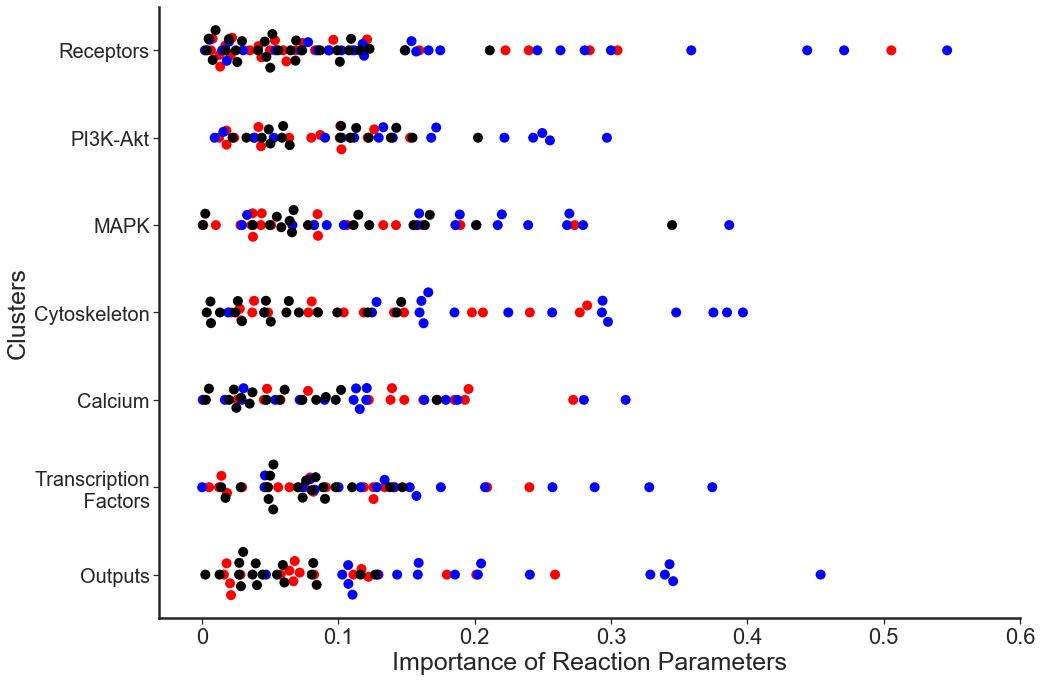

In [29]:
sns.set(font_scale=2)
sns.set_context(rc={"lines.linewidth": 5})
sns.set_style("ticks", {'axes.grid' : False, 'font.sans-serif':'Arial'})
plt.figure(figsize = (15,10))
#ax = sns.boxplot(x="Cluster", y="Importance", data=new_dataframe)
ax = sns.swarmplot(x="Importance", 
                   y="Cluster", 
                   data=new_dataframe_w,
                   orient='h',
                   size = 10,
                   order = ['Receptors', 'PI3K-Akt', 'MAPK', 'Cytoskeleton', 'Calcium', 'Transcription Factors', 'Outputs'], 
                   color="red")
ax = sns.swarmplot(x="Importance", 
                   y="Cluster", 
                   data=new_dataframe_ec,
                   orient='h',
                   size = 10,
                   order = ['Receptors', 'PI3K-Akt', 'MAPK', 'Cytoskeleton', 'Calcium', 'Transcription Factors', 'Outputs'], 
                   color="blue")
ax = sns.swarmplot(x="Importance", 
                   y="Cluster", 
                   data=new_dataframe,
                   orient='h',
                   size = 10,
                   order = ['Receptors', 'PI3K-Akt', 'MAPK', 'Cytoskeleton', 'Calcium', 'Transcription Factors', 'Outputs'], 
                   color="black")
plt.ylabel('Clusters', fontproperties = chf_v5)
plt.xlabel('Importance of Reaction Parameters', fontproperties = chf_v5)
plt.yticks(np.arange(0,7,1), 
           ('Receptors', 'PI3K-Akt', 'MAPK', 'Cytoskeleton', 'Calcium', 'Transcription\n Factors', 'Outputs'), 
           fontproperties = chf_v4)
plt.xticks(np.array([0,0.1,0.2,0.3,0.4,0.5,0.6]), 
           ('0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6'))
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)
sns.despine()
plt.tight_layout()
#plt.savefig('cluster_importance_withoutput_overall.pdf', dpi=600)
plt.show()